In [2]:
import pandas as pd

df = pd.read_csv("catfish.csv")
df.head()

,Date,Total
0,1986-1-01,9034
1,1986-2-01,9596
2,1986-3-01,10558
3,1986-4-01,9002
4,1986-5-01,9239


In [3]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.Total.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -0.392273
p-value: 0.911381


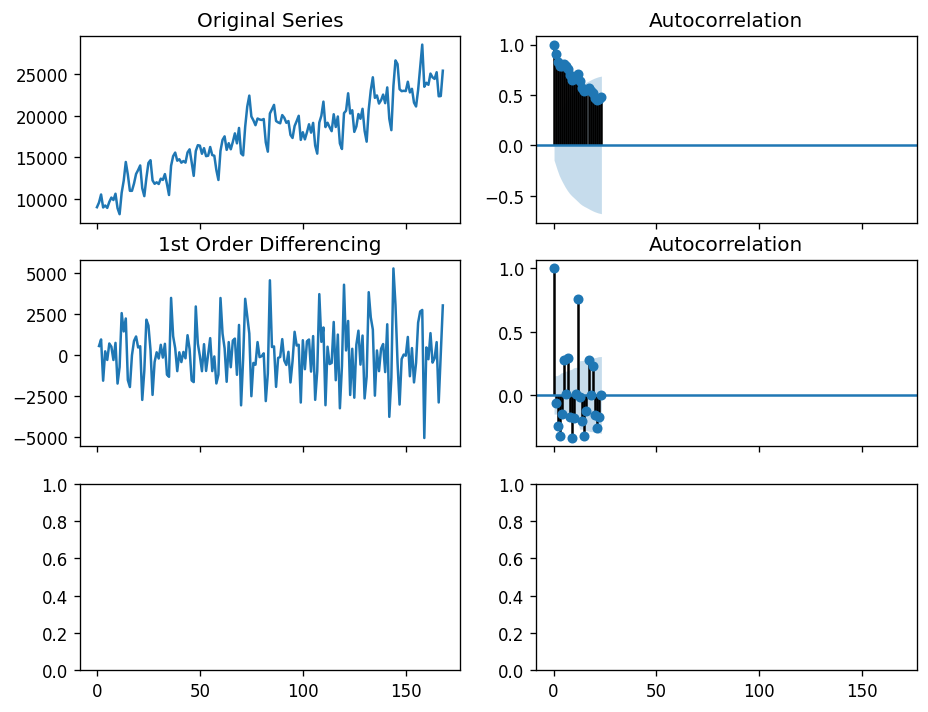

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Total); axes[0, 0].set_title('Original Series')
plot_acf(df.Total, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Total.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Total.diff().dropna(), ax=axes[1, 1])

plt.show()

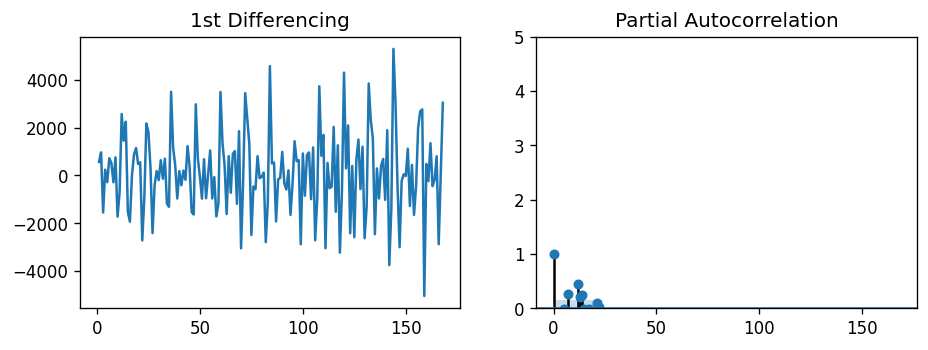

In [6]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Total.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.Total.diff().dropna(), ax=axes[1])

plt.show()

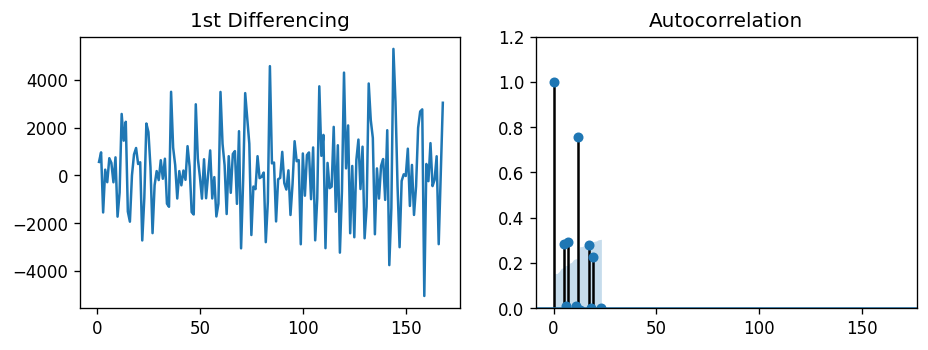

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Total.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Total.diff().dropna(), ax=axes[1])

plt.show()

In [16]:
# importing the ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# 1,1,1 ARIMA Model values of p d q 
model = ARIMA(df.Total, order=(1,1,1))

# Training teh model
model_fit = model.fit()

In [12]:
# # Plot residual errors
# residuals = pd.DataFrame(model_fit.resid)
# fig, ax = plt.subplots(1,2)
# residuals.plot(title="Residuals", ax=ax[0])
# residuals.plot(kind='kde', title='Density', ax=ax[1])
# plt.show()

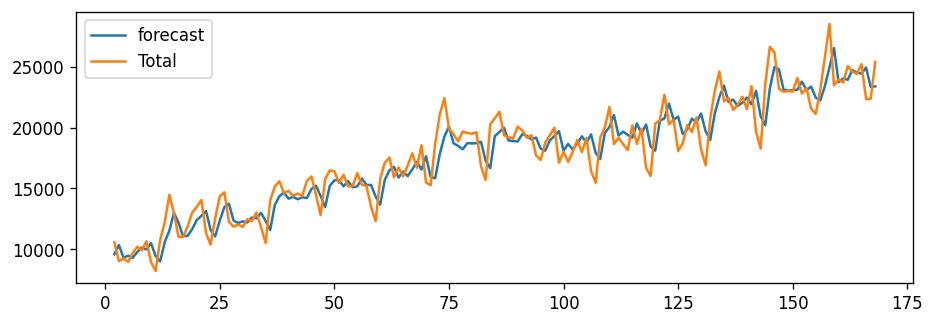

In [15]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [26]:
# from statsmodels.tsa.stattools import acf


# Create Training and Test
train = df.Total[:130]
test = df.Total[130:]

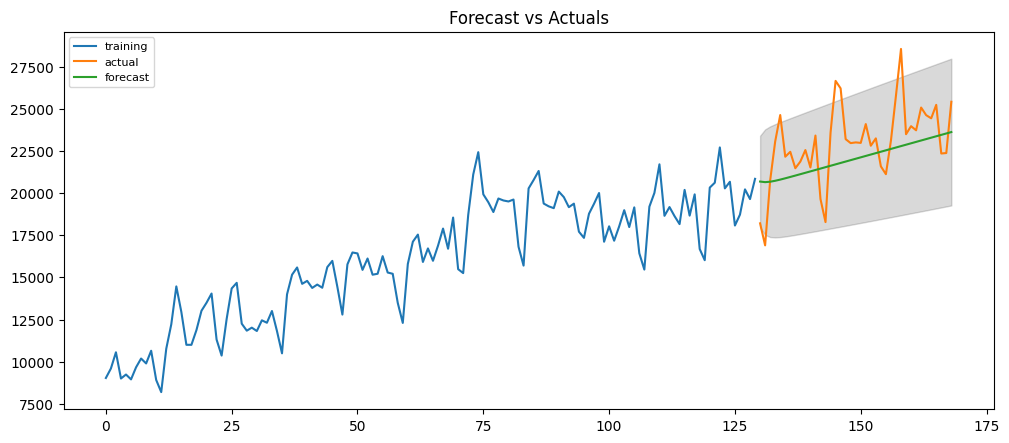

In [28]:
#  Build Model 
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  

# Forecast using 95% confidence interval
fc, se, conf = fitted.forecast(39, alpha=0.05) 

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [30]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Total), len(df.Total)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.Total)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()


TypeError: ignored

In [ ]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [33]:
# Importing the dataset
dataset = pd.read_csv('AirPassengers.csv')
#converting string to Pandas datatime
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True) 
df = dataset.set_index(['Month'])

# printing
df.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [34]:
# checking for null values
df.isnull().sum()

#Passengers    0
dtype: int64

<function matplotlib.pyplot.show>

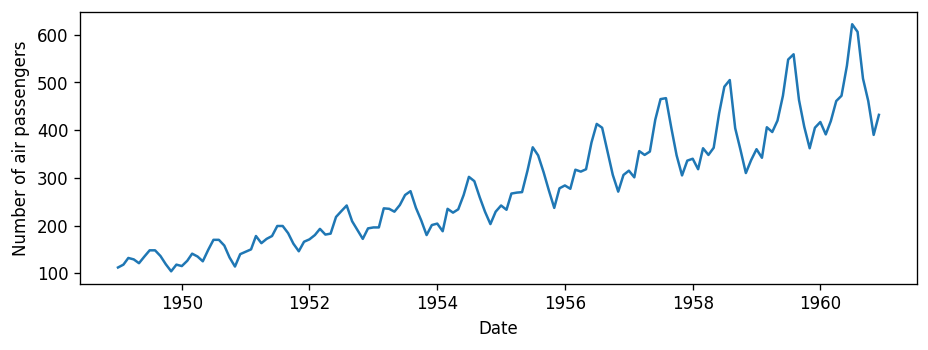

In [35]:
# labeling
plt.xlabel('Date')
plt.ylabel('Number of air passengers')

# plotting
plt.plot(df)
plt.show

In [36]:
#Determine rolling statistics
rolmean = df.rolling(window=12).mean() 
rolstd = df.rolling(window=12).std()


#window size 12 denotes 12 months, giving rolling mean at yearly level

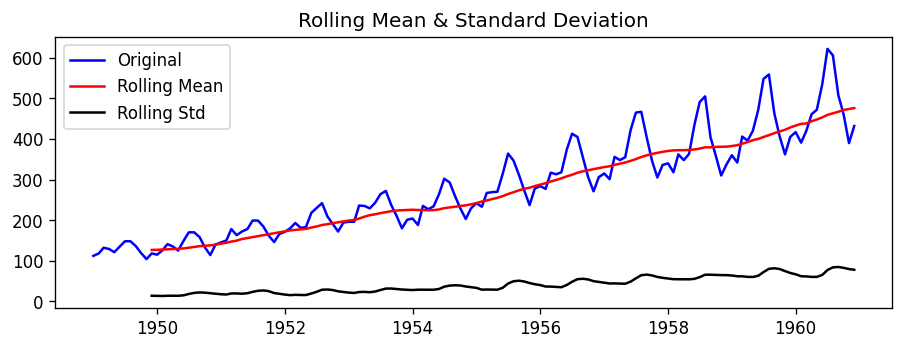

In [37]:
#Plot rolling statistics
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')

# labeling
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

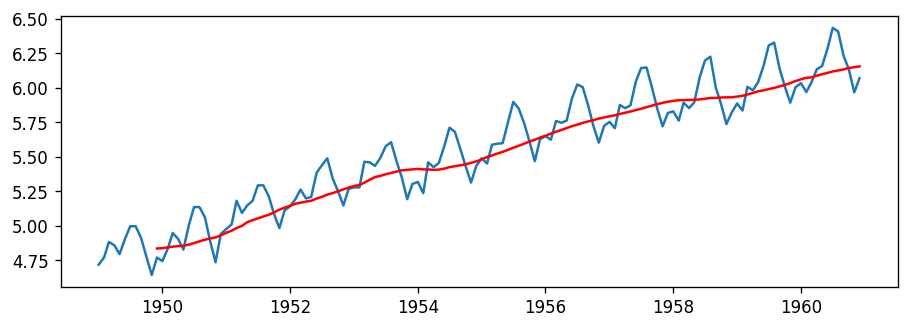

In [39]:
# importing the module
import numpy as np


#Estimating trend
logScale = np.log(df)

#The below transformation is required to make series stationary
movingAverage = logScale.rolling(window=12).mean()
movingSTD = logScale.rolling(window=12).std()

# plotting the graph
plt.plot(logScale)
plt.plot(movingAverage, color='red')
plt.show()

In [41]:

# Trasformed dataset
log_transformed = logScale - movingAverage
log_transformed.head(12)

#Remove NAN values
log_transformed.dropna(inplace=True)

# printing heading of dataset
log_transformed.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


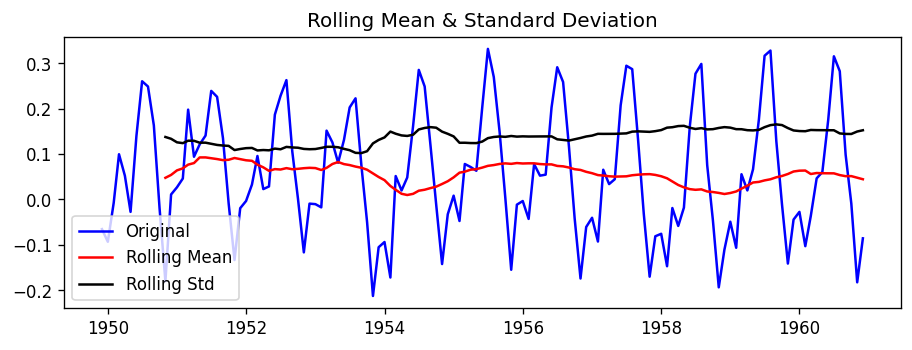

In [42]:
#Determine rolling statistics
movingAverage = log_transformed.rolling(window=12).mean()
movingSTD = log_transformed.rolling(window=12).std()
    
#Plot rolling statistics for the transformed dataset
orig = plt.plot(log_transformed, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')

# Labeling
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

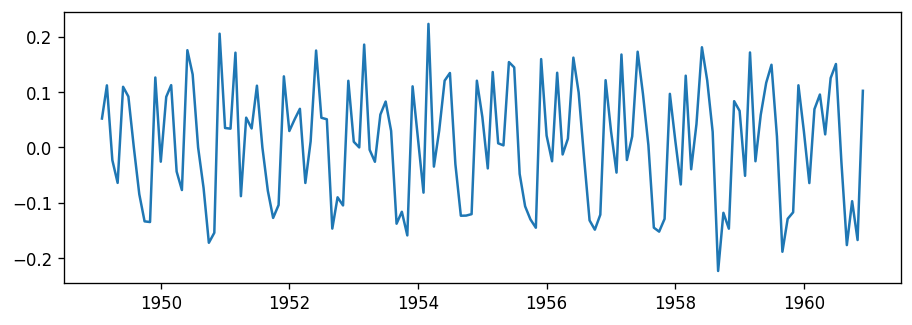

In [44]:
# transforming the dataset
Shifting = logScale - logScale.shift()

# plotting 
plt.plot(Shifting)
plt.show()

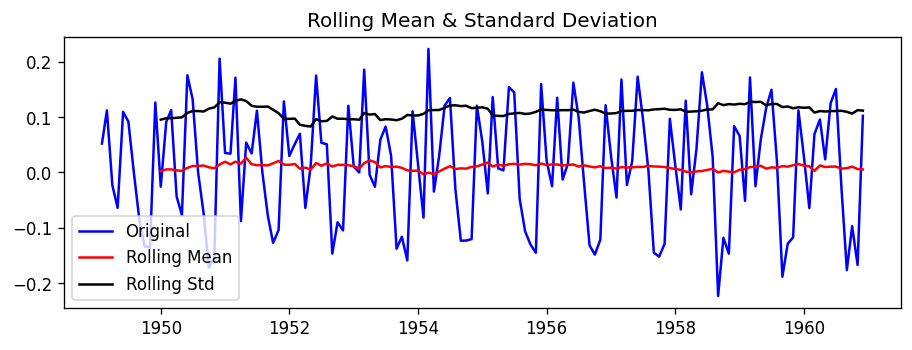

In [45]:
#Determine rolling statistics
movingAverage = Shifting.rolling(window=12).mean()
movingSTD = Shifting.rolling(window=12).std()
    
#Plot rolling statistics for the transformed dataset
orig = plt.plot(Shifting, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')

# Labeling
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


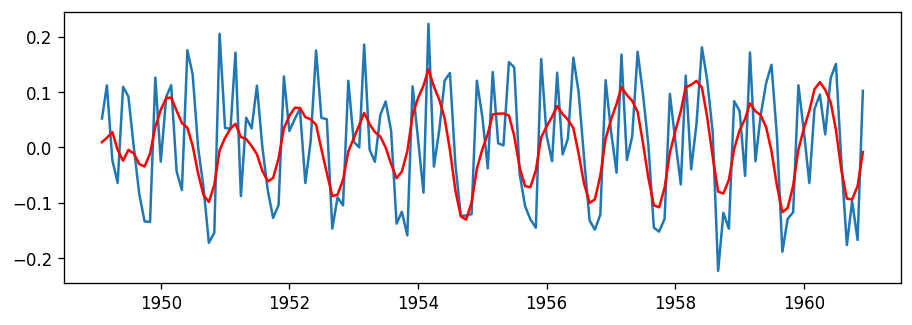

In [48]:
# 2, 1, 2 values p d q
model = ARIMA(logScale, order=(2,1,2))

# fiting the model
results_ARIMA = model.fit()

# plotting the results
plt.plot(Shifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()


In [49]:
# making predictions
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)

#Convert to cumulative sum
predictions_ARIMA_cumsum = predictions_ARIMA.cumsum()

# reversing the transformation
predictions_ARIMA_log = pd.Series(logScale['#Passengers'].iloc[0], index=logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_cumsum, fill_value=0)

# printing heading 
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773240
1949-05-01    4.768720
dtype: float64

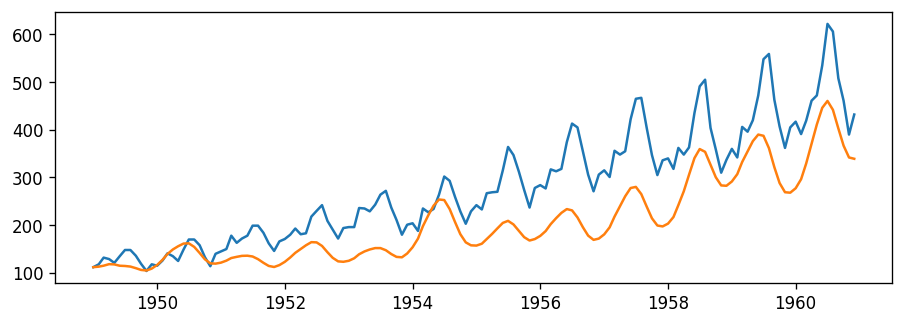

In [50]:
# Inverse of log is exp 
predictions_ARIMA = np.exp(predictions_ARIMA_log)

# plotting actual values
plt.plot(df)

# plotting predictions
plt.plot(predictions_ARIMA)
plt.show()

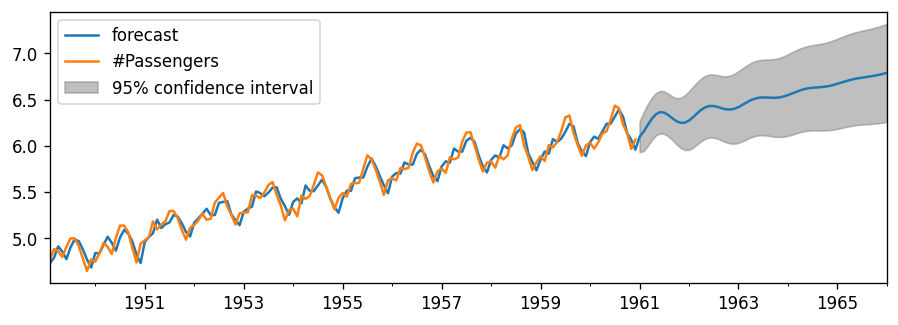

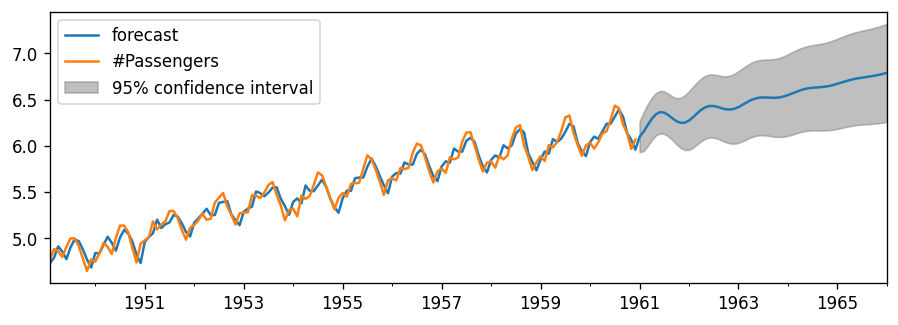

In [53]:
# making predictions for five years
results_ARIMA.plot_predict(1, 204) 

#We have 144(existing data of 12 yrs in months) data points. 
#And we want to forecast for additional 120 data points or 10 yrs.